In [1]:
import sys
sys.path.append('../../')
sys.path.append('../../../pyswip/')

In [2]:
from problog.program import PrologString
from prolog_engine import PrologEngine
from problog.formula import LogicFormula

In [3]:
prog1='''
0.5::a(1).
0.3::b(1).
0.8::a(2).
c(X) :- a(X),b(X).
c(X) :- a(X).'''
program = PrologString(prog1)

In [4]:
engine = PrologEngine()

In [5]:
sp = engine.prepare(program)
print(sp)

cl(c(A1),(a(A1),b(A1)),1.0).
cl(c(A1),(a(A1)),1.0).
cl(a(1),true,0.5).
cl(b(1),true,0.3).
cl(a(2),true,0.8).


In [6]:
formula = LogicFormula(keep_all=False)
formula = engine.ground(sp, 'c(X)')

[:-(c(1),,(,(:-(a(1),,(true,p(0.5))),:-(b(1),,(true,p(0.3)))),p(1.0))), :-(c(1),,(:-(a(1),,(true,p(0.5))),p(1.0))), :-(c(2),,(:-(a(2),,(true,p(0.8))),p(1.0)))]
{'X': _1686, 'Proofs': [:-(c(1),,(,(:-(a(1),,(true,p(0.5))),:-(b(1),,(true,p(0.3)))),p(1.0))), :-(c(1),,(:-(a(1),,(true,p(0.5))),p(1.0))), :-(c(2),,(:-(a(2),,(true,p(0.8))),p(1.0)))]}


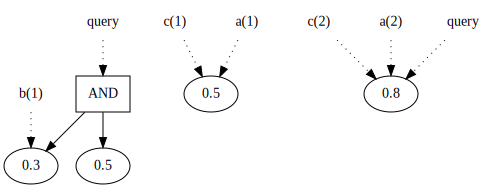

In [7]:
from graphviz import Source

Source(formula.to_dot())